# 3. Model Architecture Visualization

This notebook visualizes the S3Rec model architecture and its components.

In [3]:
import sys
sys.path.insert(0, '..')

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Rectangle

plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
from models.lowrank_aap import LowRankAAP, FullRankAAP
from models.modules import TransformerEncoder
from models.s3rec import S3RecModel, S3RecLowRankModel

## 1. S3Rec Architecture Overview

/var/folders/g4/4xxn5wy92jq88b7m6rzftz640000gn/T/ipykernel_89911/2133334552.py:97: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g4/4xxn5wy92jq88b7m6rzftz640000gn/T/ipykernel_89911/2133334552.py:97: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g4/4xxn5wy92jq88b7m6rzftz640000gn/T/ipykernel_89911/2133334552.py:97: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/g4/4xxn5wy92jq88b7m6rzftz640000gn/T/ipykernel_89911/2133334552.py:98: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('../results/figures/architecture.png', dpi=150, bbox_inches='tight')
/var/folders/g4/4xxn5wy92jq88b7m6rzftz640000gn/T/ipykernel_89911/2133334552.py:98: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('../results/figures/architecture.png', dpi=150, 

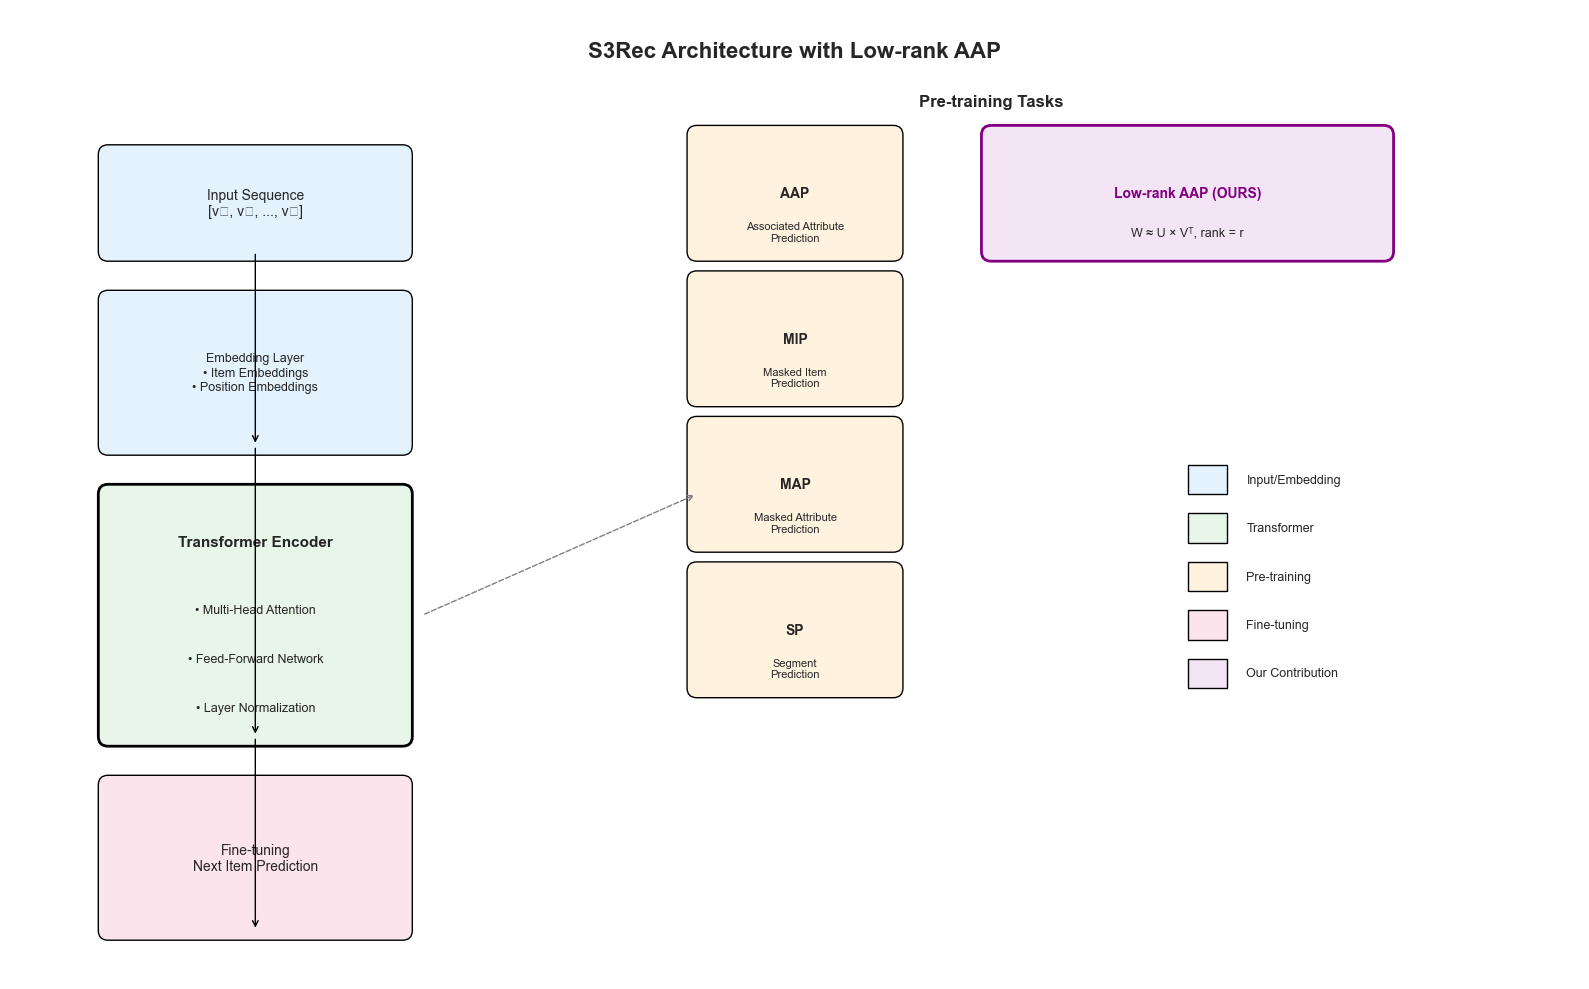

In [5]:
def draw_architecture():
    """Draw the S3Rec architecture diagram"""
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Colors
    colors = {
        'embedding': '#E3F2FD',
        'transformer': '#E8F5E9',
        'pretrain': '#FFF3E0',
        'finetune': '#FCE4EC',
        'lowrank': '#F3E5F5'
    }
    
    # Title
    ax.text(8, 9.5, 'S3Rec Architecture with Low-rank AAP', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Input Layer
    ax.add_patch(FancyBboxPatch((1, 7.5), 3, 1, boxstyle="round,pad=0.1",
                                 facecolor=colors['embedding'], edgecolor='black'))
    ax.text(2.5, 8, 'Input Sequence\n[v₁, v₂, ..., vₙ]', ha='center', va='center', fontsize=10)
    
    # Embedding Layer
    ax.add_patch(FancyBboxPatch((1, 5.5), 3, 1.5, boxstyle="round,pad=0.1",
                                 facecolor=colors['embedding'], edgecolor='black'))
    ax.text(2.5, 6.25, 'Embedding Layer\n• Item Embeddings\n• Position Embeddings', 
            ha='center', va='center', fontsize=9)
    
    # Arrow
    ax.annotate('', xy=(2.5, 5.5), xytext=(2.5, 7.5),
                arrowprops=dict(arrowstyle='->', color='black'))
    
    # Transformer Encoder
    ax.add_patch(FancyBboxPatch((1, 2.5), 3, 2.5, boxstyle="round,pad=0.1",
                                 facecolor=colors['transformer'], edgecolor='black', linewidth=2))
    ax.text(2.5, 4.5, 'Transformer Encoder', ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(2.5, 3.8, '• Multi-Head Attention', ha='center', va='center', fontsize=9)
    ax.text(2.5, 3.3, '• Feed-Forward Network', ha='center', va='center', fontsize=9)
    ax.text(2.5, 2.8, '• Layer Normalization', ha='center', va='center', fontsize=9)
    
    # Arrow
    ax.annotate('', xy=(2.5, 2.5), xytext=(2.5, 5.5),
                arrowprops=dict(arrowstyle='->', color='black'))
    
    # Pre-training tasks (right side)
    ax.text(10, 9, 'Pre-training Tasks', ha='center', fontsize=12, fontweight='bold')
    
    pretrain_tasks = [
        ('AAP', 'Associated Attribute\nPrediction'),
        ('MIP', 'Masked Item\nPrediction'),
        ('MAP', 'Masked Attribute\nPrediction'),
        ('SP', 'Segment\nPrediction')
    ]
    
    for i, (name, desc) in enumerate(pretrain_tasks):
        y_pos = 7.5 - i * 1.5
        ax.add_patch(FancyBboxPatch((7, y_pos), 2, 1.2, boxstyle="round,pad=0.1",
                                     facecolor=colors['pretrain'], edgecolor='black'))
        ax.text(8, y_pos + 0.6, f'{name}', ha='center', va='center', fontsize=10, fontweight='bold')
        ax.text(8, y_pos + 0.2, desc, ha='center', va='center', fontsize=8)
    
    # Low-rank AAP highlight
    ax.add_patch(FancyBboxPatch((10, 7.5), 4, 1.2, boxstyle="round,pad=0.1",
                                 facecolor=colors['lowrank'], edgecolor='purple', linewidth=2))
    ax.text(12, 8.1, 'Low-rank AAP (OURS)', ha='center', va='center', fontsize=10, fontweight='bold', color='purple')
    ax.text(12, 7.7, 'W ≈ U × Vᵀ, rank = r', ha='center', va='center', fontsize=9)
    
    # Arrow from pretrain tasks
    ax.annotate('', xy=(7, 5), xytext=(4.2, 3.75),
                arrowprops=dict(arrowstyle='->', color='gray', linestyle='--'))
    
    # Fine-tuning (bottom)
    ax.add_patch(FancyBboxPatch((1, 0.5), 3, 1.5, boxstyle="round,pad=0.1",
                                 facecolor=colors['finetune'], edgecolor='black'))
    ax.text(2.5, 1.25, 'Fine-tuning\nNext Item Prediction', ha='center', va='center', fontsize=10)
    
    # Arrow
    ax.annotate('', xy=(2.5, 0.5), xytext=(2.5, 2.5),
                arrowprops=dict(arrowstyle='->', color='black'))
    
    # Legend
    legend_items = [
        (colors['embedding'], 'Input/Embedding'),
        (colors['transformer'], 'Transformer'),
        (colors['pretrain'], 'Pre-training'),
        (colors['finetune'], 'Fine-tuning'),
        (colors['lowrank'], 'Our Contribution')
    ]
    
    for i, (color, label) in enumerate(legend_items):
        ax.add_patch(Rectangle((12, 5 - i * 0.5), 0.4, 0.3, facecolor=color, edgecolor='black'))
        ax.text(12.6, 5.15 - i * 0.5, label, fontsize=9, va='center')
    
    plt.tight_layout()
    plt.savefig('../results/figures/architecture.png', dpi=150, bbox_inches='tight')
    plt.show()

draw_architecture()

## 2. Transformer Encoder Details

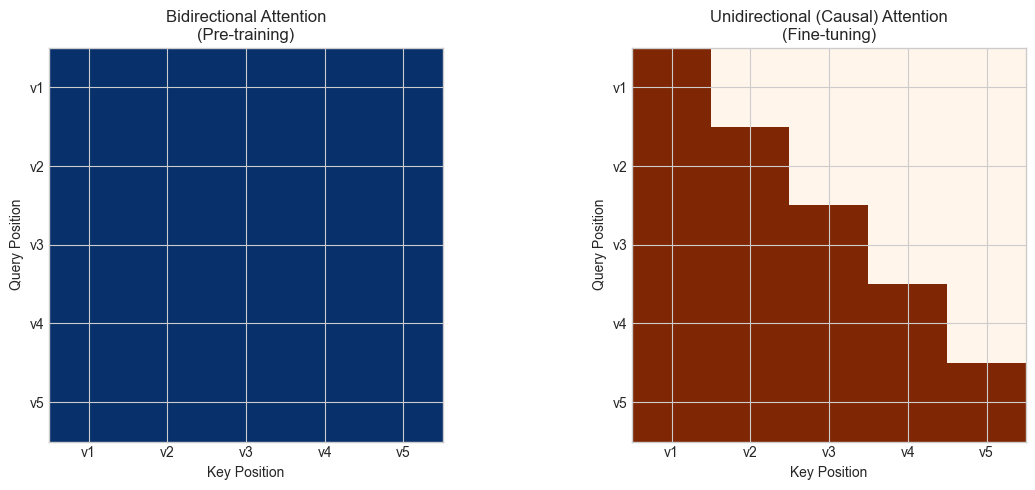

Bidirectional: Each position can attend to ALL positions
Unidirectional: Each position can only attend to PREVIOUS positions


In [6]:
def visualize_attention(seq_len=5):
    """Visualize self-attention patterns"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bidirectional (pre-training)
    ax1 = axes[0]
    attention = np.ones((seq_len, seq_len))
    im1 = ax1.imshow(attention, cmap='Blues', vmin=0, vmax=1)
    ax1.set_title('Bidirectional Attention\n(Pre-training)', fontsize=12)
    ax1.set_xlabel('Key Position')
    ax1.set_ylabel('Query Position')
    ax1.set_xticks(range(seq_len))
    ax1.set_yticks(range(seq_len))
    ax1.set_xticklabels([f'v{i+1}' for i in range(seq_len)])
    ax1.set_yticklabels([f'v{i+1}' for i in range(seq_len)])
    
    # Unidirectional (fine-tuning)
    ax2 = axes[1]
    mask = np.tril(np.ones((seq_len, seq_len)))
    im2 = ax2.imshow(mask, cmap='Oranges', vmin=0, vmax=1)
    ax2.set_title('Unidirectional (Causal) Attention\n(Fine-tuning)', fontsize=12)
    ax2.set_xlabel('Key Position')
    ax2.set_ylabel('Query Position')
    ax2.set_xticks(range(seq_len))
    ax2.set_yticks(range(seq_len))
    ax2.set_xticklabels([f'v{i+1}' for i in range(seq_len)])
    ax2.set_yticklabels([f'v{i+1}' for i in range(seq_len)])
    
    plt.tight_layout()
    plt.savefig('../results/figures/attention_patterns.png', dpi=150)
    plt.show()
    
    print("Bidirectional: Each position can attend to ALL positions")
    print("Unidirectional: Each position can only attend to PREVIOUS positions")

visualize_attention()

## 3. Low-rank AAP Module

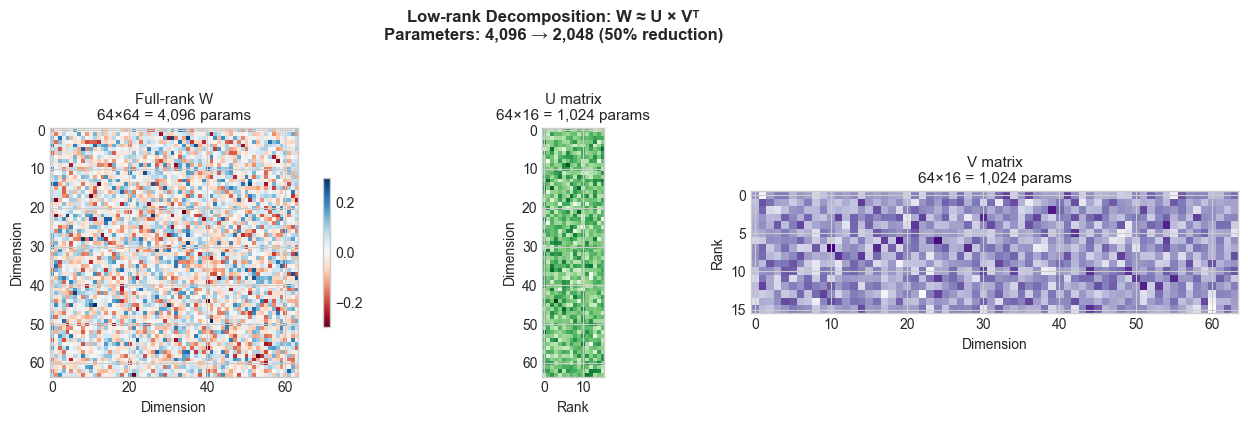

In [7]:
def visualize_lowrank_decomposition(d=64, r=16):
    """Visualize the low-rank decomposition"""
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    
    # Full-rank W
    ax1 = axes[0]
    W = np.random.randn(d, d) * 0.1
    im1 = ax1.imshow(W, cmap='RdBu', vmin=-0.3, vmax=0.3)
    ax1.set_title(f'Full-rank W\n{d}×{d} = {d*d:,} params', fontsize=11)
    ax1.set_xlabel('Dimension')
    ax1.set_ylabel('Dimension')
    plt.colorbar(im1, ax=ax1, shrink=0.6)
    
    # U matrix
    ax2 = axes[1]
    U = np.random.randn(d, r) * 0.1
    V = np.random.randn(d, r) * 0.1
    
    # Combined visualization
    combined = np.zeros((d, d))
    combined[:, :r] = U * 2  # Scale for visibility
    
    ax2.imshow(U, cmap='Greens', vmin=-0.3, vmax=0.3)
    ax2.set_title(f'U matrix\n{d}×{r} = {d*r:,} params', fontsize=11)
    ax2.set_xlabel('Rank')
    ax2.set_ylabel('Dimension')
    
    # V matrix
    ax3 = axes[2]
    ax3.imshow(V.T, cmap='Purples', vmin=-0.3, vmax=0.3)
    ax3.set_title(f'V matrix\n{d}×{r} = {d*r:,} params', fontsize=11)
    ax3.set_xlabel('Dimension')
    ax3.set_ylabel('Rank')
    
    fig.suptitle(f'Low-rank Decomposition: W ≈ U × Vᵀ\n'
                 f'Parameters: {d*d:,} → {2*d*r:,} ({100*(1-2*r/d):.0f}% reduction)',
                 fontsize=12, fontweight='bold', y=1.05)
    
    plt.tight_layout()
    plt.savefig('../results/figures/lowrank_decomposition.png', dpi=150, bbox_inches='tight')
    plt.show()

visualize_lowrank_decomposition()

## 4. Model Summary

In [8]:
# Model instantiation and summary
num_items = 12102
num_attrs = 1221
hidden_size = 64

print("="*60)
print("S3Rec Model Configuration")
print("="*60)
print(f"  Vocabulary:")
print(f"    Items: {num_items:,}")
print(f"    Attributes: {num_attrs:,}")
print(f"  Architecture:")
print(f"    Hidden size: {hidden_size}")
print(f"    Num layers: 2")
print(f"    Num heads: 2")
print(f"    Max sequence: 50")
print()

# Parameter comparison
print("="*60)
print("Parameter Comparison")
print("="*60)

baseline = S3RecModel(num_items, num_attrs, hidden_size=hidden_size)
baseline_params = sum(p.numel() for p in baseline.parameters())
print(f"  Baseline S3Rec:     {baseline_params:,} parameters")

for rank in [8, 16, 32]:
    model = S3RecLowRankModel(num_items, num_attrs, hidden_size=hidden_size, rank=rank)
    model_params = sum(p.numel() for p in model.parameters())
    reduction = (baseline_params - model_params) / baseline_params * 100
    print(f"  Low-rank (r={rank:2d}):    {model_params:,} parameters ({reduction:.1f}% reduction)")

S3Rec Model Configuration
  Vocabulary:
    Items: 12,102
    Attributes: 1,221
  Architecture:
    Hidden size: 64
    Num layers: 2
    Num heads: 2
    Max sequence: 50

Parameter Comparison
  Baseline S3Rec:     972,672 parameters
  Low-rank (r= 8):    966,400 parameters (0.6% reduction)
  Low-rank (r=16):    968,448 parameters (0.4% reduction)
  Low-rank (r=32):    972,544 parameters (0.0% reduction)


## 5. Layer-by-Layer Breakdown

In [9]:
def layer_breakdown(model, name="Model"):
    """Show parameters per layer"""
    print(f"\n{name} - Layer Breakdown:")
    print("-" * 50)
    
    total = 0
    for layer_name, param in model.named_parameters():
        if param.requires_grad:
            n = param.numel()
            total += n
            # Shorten layer names
            short_name = layer_name.replace('transformer_encoder.', 'enc.')
            short_name = short_name.replace('.weight', '.W')
            short_name = short_name.replace('.bias', '.b')
            if n > 1000:
                print(f"  {short_name:<40} {n:>10,}")
    
    print("-" * 50)
    print(f"  {'TOTAL':<40} {total:>10,}")
    
baseline = S3RecModel(12102, 1221, hidden_size=64)
layer_breakdown(baseline, "Baseline S3Rec")

lowrank = S3RecLowRankModel(12102, 1221, hidden_size=64, rank=16)
layer_breakdown(lowrank, "Low-rank S3Rec (r=16)")


Baseline S3Rec - Layer Breakdown:
--------------------------------------------------
  item_embeddings.W                           774,592
  attribute_embeddings.W                       78,144
  position_embeddings.W                         3,200
  encoder.layers.0.attention.query.W            4,096
  encoder.layers.0.attention.key.W              4,096
  encoder.layers.0.attention.value.W            4,096
  encoder.layers.0.attention.dense.W            4,096
  encoder.layers.0.ffn.dense1.W                16,384
  encoder.layers.0.ffn.dense2.W                16,384
  encoder.layers.1.attention.query.W            4,096
  encoder.layers.1.attention.key.W              4,096
  encoder.layers.1.attention.value.W            4,096
  encoder.layers.1.attention.dense.W            4,096
  encoder.layers.1.ffn.dense1.W                16,384
  encoder.layers.1.ffn.dense2.W                16,384
  aap_head.W.W                                  4,096
  mip_head.W                                    4,

## Summary

Key architectural insights:
1. **Transformer Encoder** - Main sequence processing component
2. **Bidirectional vs Unidirectional** - Pre-training vs Fine-tuning attention patterns  
3. **Low-rank AAP** - Reduces parameters while maintaining performance
4. **Item & Attribute Embeddings** - Majority of parameters